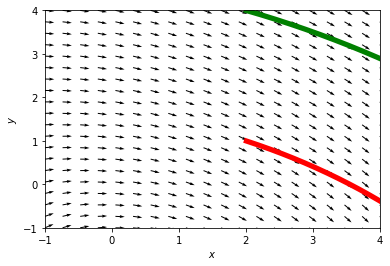

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import *
from scipy import integrate
from scipy.integrate import ode
fig = plt.figure(num=1)
ax=fig.add_subplot(111)
## Vector field functionn
def vf(t,x):
  dx=np.zeros(2)
  dx[0]=1
  dx[1]= -((3*x[0])+x[1]+1)/(x[0]+(3*x[1])+11)
#X[0] is x and x[1] is y
  return dx

#Solution curves
t0=0; tEnd=10; dt=0.01;
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)
ic=[[2,1],[2,4]]
color=['r','g']
for k in range(len(ic)):
    Y=[];T=[];S=[];
    r.set_initial_value(ic[k], t0).set_f_params()
    while r.successful() and r.t +dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S=np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = color[k], lw = 5.25)

#Vector field
X,Y = np.meshgrid( np.linspace(-1,4,20),np.linspace(-1,4,20) )
U = 1
V = -((3*X)+Y+1)/(X+(3*Y)+11)

#Normalize arrows
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
ax.quiver( X,Y,U2, V2)
#u2 and v2 are in charge of creating the module of the vectors.


plt.xlim([-1,4])
plt.ylim([-1,4])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

In [25]:
#To find the constants.
import math
import numpy as np
levels_solution= []
x=2
y=1
C= (-1/2)*np.log(3+(2*((y+4)/(x-1)))+(3*(((y**2)+16+(8*y))/((x**2)+1-(2*x)))))-np.log(x-1)
print('C value is',C)
levels_solution.append(C)
x=2
y=4
C1= (-1/2)*np.log(3+(2*((y+4)/(x-1)))+(3*(((y**2)+16+(8*y))/((x**2)+1-(2*x)))))-np.log(x-1)
print('C1 value is',C1)
levels_solution.append(C1)

C value is -2.2386684072391034
C1 value is -2.6759290667380333


In [26]:
## Levels we are interested to compare solution from gradient field
print(levels_solution)
levels=sorted(levels_solution)
print(levels)## Ordenado para plotear las contour curves

[-2.2386684072391034, -2.6759290667380333]
[-2.6759290667380333, -2.2386684072391034]


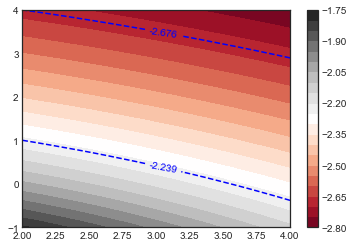

In [27]:
#I have integrate to find y_exact but we see that it is impossible to find y, it is implicit. So we decide to do contour curves.
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-white')

xs = np.linspace(2,4, 20)
ys = np.linspace(-1,4, 20)

def fs(xs, ys): #y_exact equation without constant
    return (-1/2)*np.log(3+(2*((ys+4)/(xs-1)))+(3*(((ys**2)+16+(8*ys))/((xs**2)+1-(2*xs)))))-np.log(xs-1)



X, Y = np.meshgrid(xs, ys)

Z = fs(X,Y)

contours = plt.contour(X, Y, Z, levels, colors='blue')
plt.clabel(contours, inline=1, fontsize=10)

plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()